In [63]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [64]:
# Old file
# home_audio = pd.read_csv('C:/Data Science/Capstone Project/Model Files/HomeAudio.csv')

home_audio = pd.read_csv('C:/Data Science/Capstone Project/HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [65]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [66]:
home_audio.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'deliverybdays', 'deliverycdays', 's1_fact_order_payment_type',
       'sla', 'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'gmvperunit', 'delivery_on_time',
       'delivery_status', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       ' Affiliates', 'week_y', 'NPS', 'Stock Index', 'NPSScore',
       'holiday_count', 'ItemType', 'month_date', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'inc_LP_MA1', 'inc_LP_MA2',
       'inc_LP_MA3', 'inc_PO_MA1', 'inc_PO_MA2', 'inc_PO_MA3', '

In [67]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3',
                              'LP_lag_3_per','PO_lag_1_per-3','GMV_lag_3_per'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"15,747,089.60","72,093,251.50",0.00,0.00,0.28,0.13,-0.78,-0.64,0.28,0.13
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,-0.10,0.62,0.44,-0.12,-0.10
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.09,-0.11,0.92,0.03,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.11,-0.11,1.16,1.16,-0.11,-0.11
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.00,0.12,0.00,-0.54,0.00,0.12


In [68]:
home_audio['LP_lag_1_per'] = home_audio['LP_lag_1_per'].fillna(0)
home_audio['LP_lag_2_per'] = home_audio['LP_lag_2_per'].fillna(0)

home_audio['PO_lag_1_per-1'] = home_audio['PO_lag_1_per-1'].fillna(0)
home_audio['PO_lag_1_per-2'] = home_audio['PO_lag_1_per-2'].fillna(0)

home_audio['GMV_lag_1_per'] = home_audio['GMV_lag_1_per'].fillna(0)
home_audio['GMV_lag_2_per'] = home_audio['GMV_lag_2_per'].fillna(0)

In [69]:
home_audio['PO_lag_1_per-1'] = home_audio['PO_lag_1_per-1'].replace([np.inf, -np.inf], 0)

In [70]:
home_audio['PO_lag_1_per-2'] = home_audio['PO_lag_1_per-2'].replace([np.inf, -np.inf], 0)

In [71]:
home_audio = home_audio.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"15,747,089.60","72,093,251.50",0.00,0.00,0.28,0.13,-0.78,-0.64,0.28,0.13
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,-0.10,0.62,0.44,-0.12,-0.10
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.09,-0.11,0.92,0.03,-0.09
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.11,-0.11,1.16,1.16,-0.11,-0.11
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"30,509,986.10","139,680,674.78",0.00,0.00,0.00,0.12,0.00,-0.54,0.00,0.12


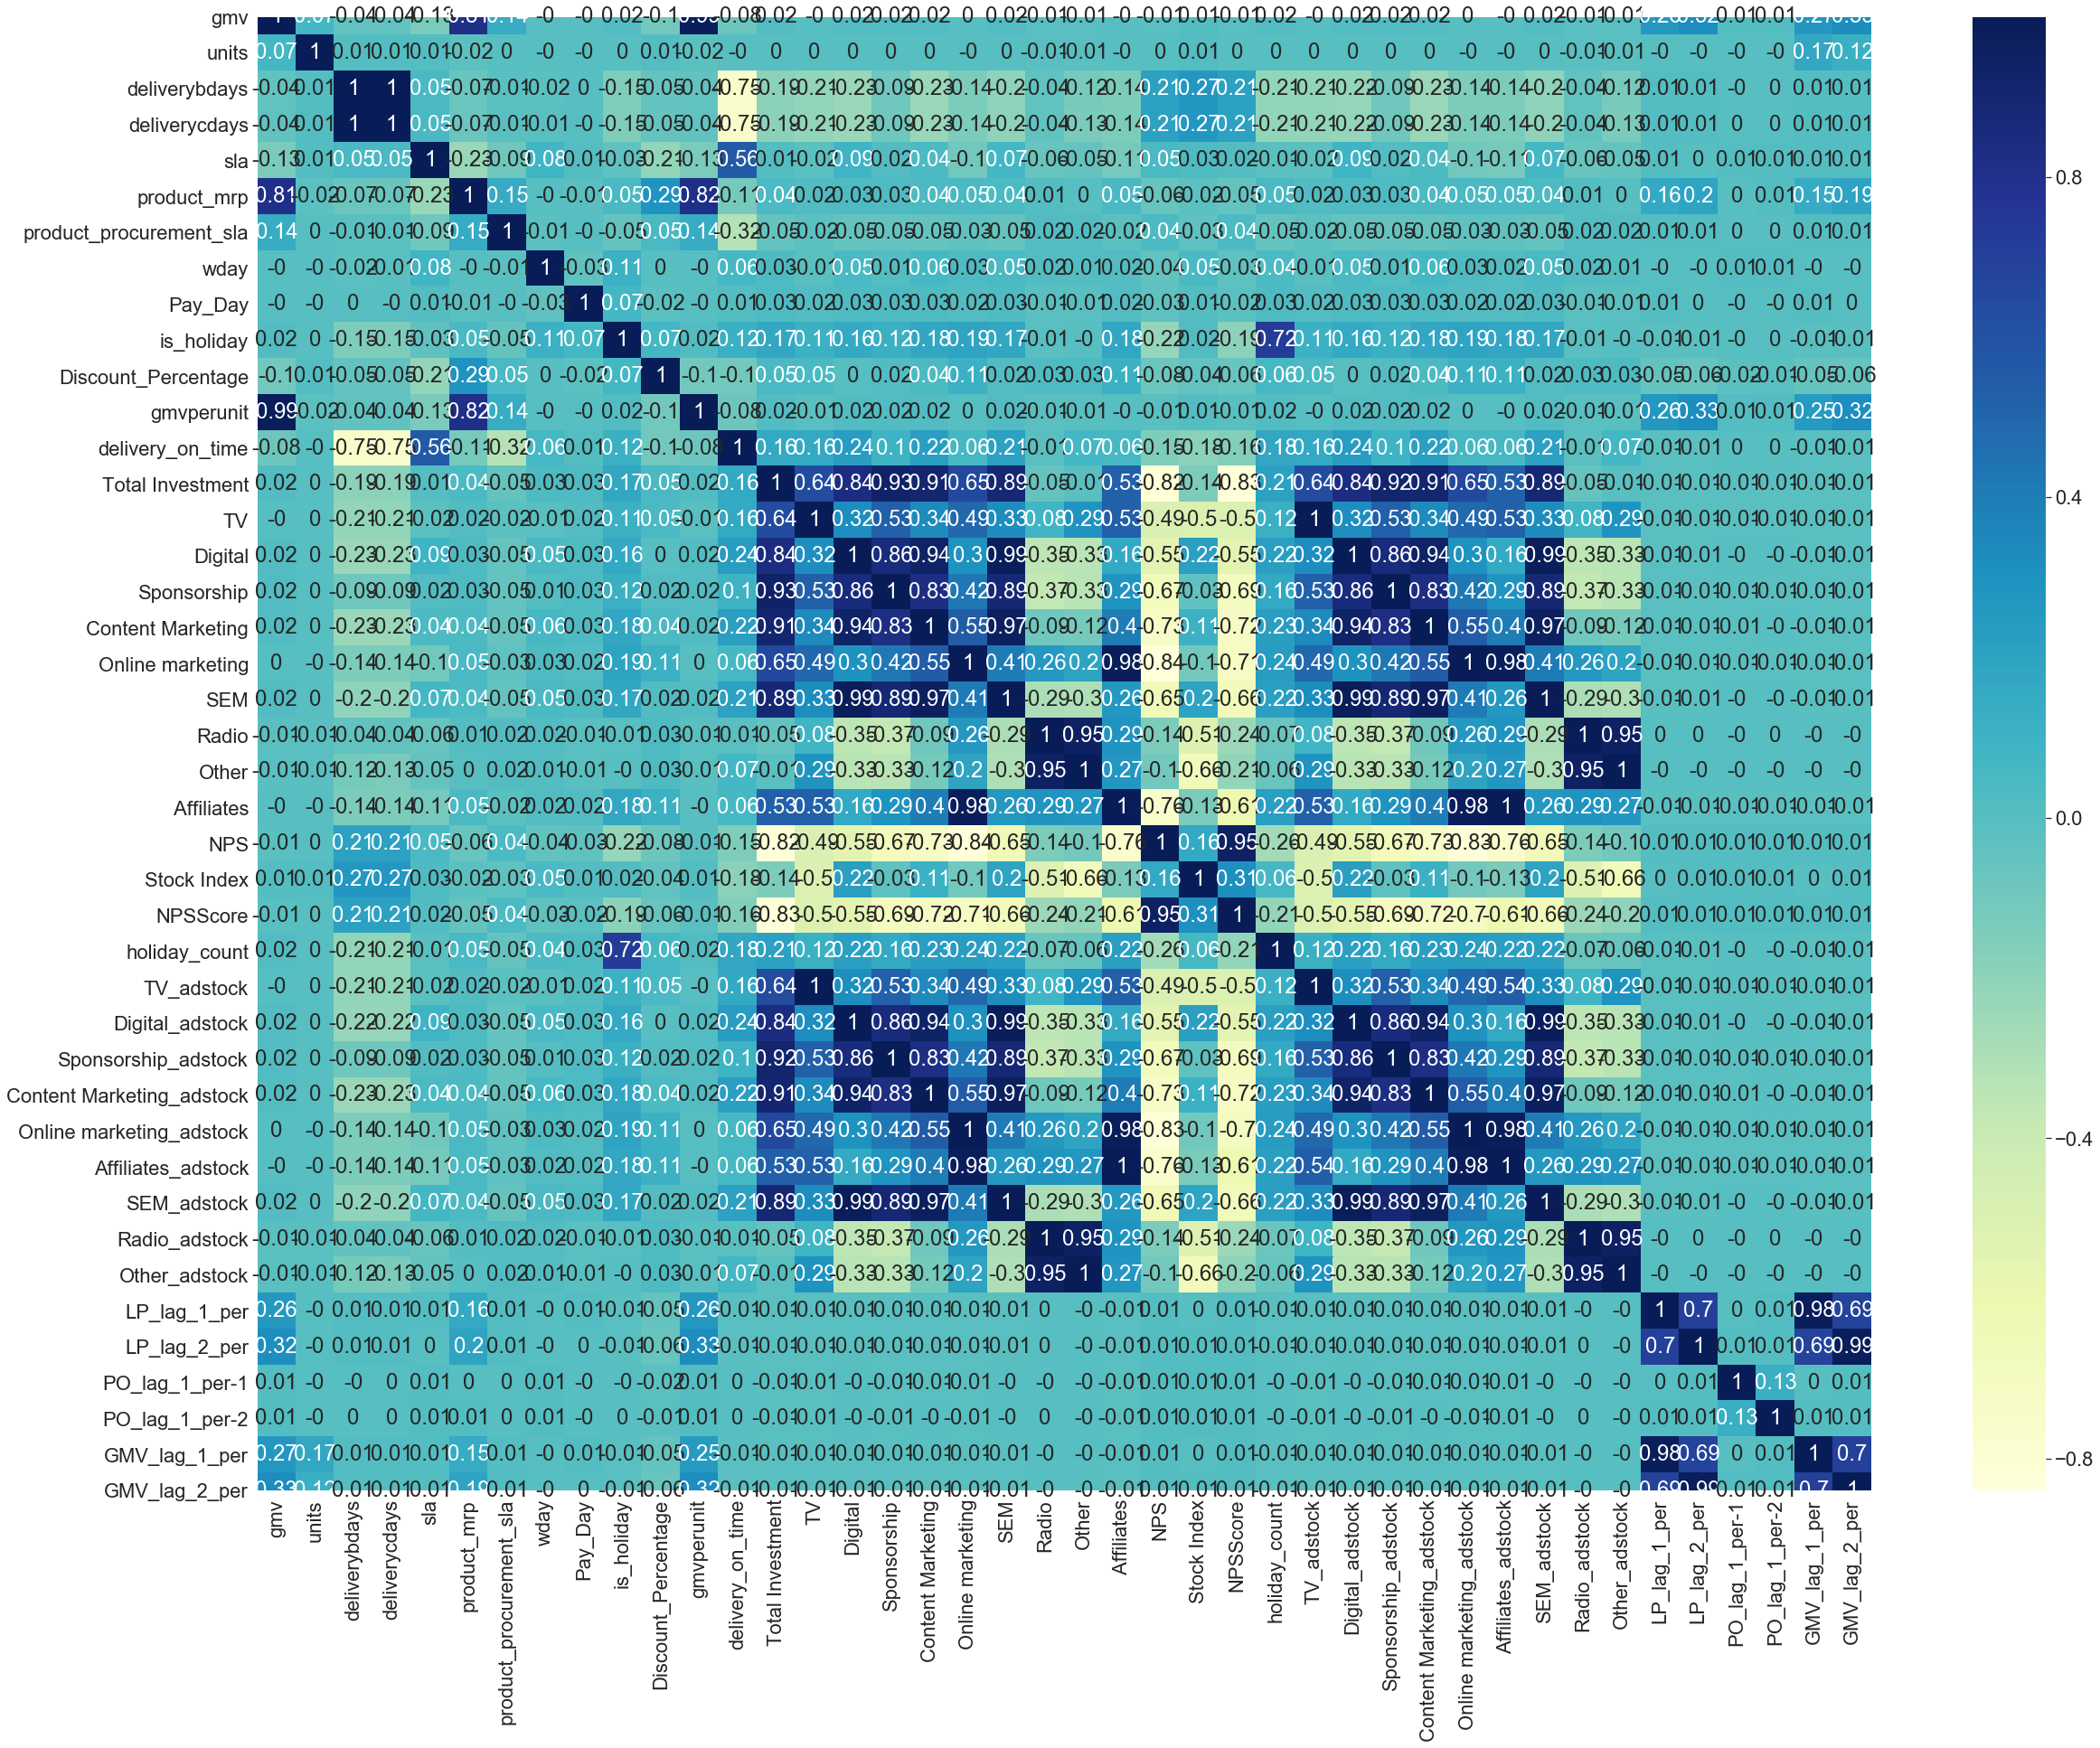

In [19]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [72]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock', 
                              'LP_lag_1_per', 'LP_lag_2_per'], axis=1)

# Doubtful
# product_mrp
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.78,-0.64,0.28,0.13
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.62,0.44,-0.12,-0.10
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.11,0.92,0.03,-0.09
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,1.16,1.16,-0.11,-0.11
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.00,-0.54,0.00,0.12


In [73]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [74]:
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.44,-0.57,0.07,0.13


In [75]:
home_audio.shape

(62116, 36)

### Creating dummies

In [76]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [77]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.44,-0.57,0.07,0.13


In [78]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [80]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.11,0.92,0.03,-0.09
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.00,-0.54,0.00,0.12
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.05,-0.68,-0.00,0.25
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.33,-0.25,-0.03,0.04
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.44,-0.57,0.07,0.13


In [81]:
# Concatenate dummy variables with X
home_audio = pd.concat([home_audio, dummies], axis=1)
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [82]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 51 columns):
gmv                                           62116 non-null float64
units                                         62116 non-null int64
deliverycdays                                 62116 non-null int64
sla                                           62116 non-null int64
product_mrp                                   62116 non-null float64
product_procurement_sla                       62116 non-null int64
wday                                          62116 non-null int64
Pay_Day                                       62116 non-null int64
is_holiday                                    62116 non-null int64
Discount_Percentage                           62116 non-null float64
delivery_on_time                              62116 non-null float64
Total Investment                              62116 non-null float64
TV                                            62116 non-null float64
Digital 

In [83]:
# for col in list(home_audio.columns):
#     plt.figure(figsize=(9,9))
#     sns.boxplot(data=home_audio, y=col).set_title(col)
    

In [84]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [85]:
# outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
#                'Online marketing', 'SEM', 'Affiliates', 'Content Marketing', 'Radio', 'Discount_Percentage']

In [86]:
# for col in outlier_cols:
#     remove_outlier(home_audio, col)

In [87]:
# home_audio = remove_outlier(home_audio, 'gmv')
# home_audio.shape

In [88]:
# home_audio = remove_outlier(home_audio, 'sla')
# home_audio.shape

In [89]:
# home_audio = remove_outlier(home_audio, 'product_mrp')
# home_audio.shape

In [90]:
# Import the required library

from sklearn.model_selection import train_test_split

In [91]:
df_train, df_test = train_test_split(home_audio, train_size=0.7, test_size=0.3, random_state=100)

In [92]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()


In [94]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [95]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in home_audio.columns:
    if col not in dum_cols:
        varlist.append(col)

In [96]:
varlist

['gmv',
 'units',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'wday',
 'Discount_Percentage',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'Stock Index',
 'NPSScore',
 'holiday_count',
 'PO_lag_1_per-1',
 'PO_lag_1_per-2',
 'GMV_lag_1_per',
 'GMV_lag_2_per']

In [97]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [98]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
62022,0.00,0.00,0.00,0.23,0.01,0.29,1.00,0,0,0.42,...,0,0,0,0,0,0,1,0,0,1
61776,0.02,0.00,0.00,0.10,0.02,0.07,0.17,1,0,0.25,...,0,0,0,0,0,0,1,0,0,1
26367,0.03,0.00,0.00,0.13,0.03,0.36,0.17,1,0,0.22,...,0,0,0,0,0,0,1,0,0,1
41294,0.02,0.00,0.00,0.18,0.02,0.07,0.67,1,1,0.24,...,1,0,0,0,0,0,0,0,0,1
58467,0.01,0.00,0.00,0.20,0.01,0.21,0.00,0,0,0.22,...,0,0,0,0,0,0,1,0,0,1


In [99]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [100]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [101]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.32552633e-01 -4.47390870e-02  1.10504121e-01  5.99837941e-01
 -3.69131015e-02 -8.66063161e-05  2.07234002e-04 -9.75336488e-04
 -3.56018384e-02 -1.04075211e-01 -9.92618700e+10  2.68605132e+10
  2.69316822e+10  4.16518869e+10  2.52047932e+10  3.42641432e+10
 -2.76927780e+10  3.01558943e+10 -1.79649064e+10 -2.76127002e+10
 -1.21731400e+10  1.45230808e+08  3.08186948e+09 -8.04475251e-04
 -1.45986790e-03  2.44957495e-03  3.34666582e-02  3.89256447e-01
  1.02382558e-03  3.79432869e-02 -4.10573483e-03 -9.29898890e-03
 -7.00500008e-03  3.41951091e-03 -4.08603745e-03  4.14166311e-02
 -1.28290175e-02  3.37137918e-02  1.71625423e-03 -2.71317222e-05
  5.03164614e-04  2.16469229e-03  1.40846471e-03  6.82528376e-04
  1.25204831e-03 -6.88385940e-04 -3.09340776e-04  1.33582270e-03
  8.14753463e-04 -7.07853981e-03]
7149332119.068048


In [103]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False  True False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ 2  8  7  1  9 35 30 29  5  6  1  1  1  1  1  1  1  1  1  1  1  1  1 33
 21 18 11  1 22  4 17 14 15 19 16  3 12 10 25 36 32 26 28 31 20 23 34 27
 24 13]


In [104]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,GMV_lag_2_per
62022,1.00,0.01,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.00,0.30,0.01
61776,1.00,0.02,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.00,0.30,0.01
26367,1.00,0.03,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.09,0.10,0.09,0.01
41294,1.00,0.02,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,1.00,0.17,0.16,0.17,0.01
58467,1.00,0.01,0.28,0.30,0.13,0.14,0.19,0.87,0.09,0.00,0.00,0.94,0.38,0.91,0.60,0.01


In [105]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:00:53   Log-Likelihood:             1.2245e+05
No. Observations:               43481   AIC:                        -2.449e+05
Df Residuals:                   43467   BIC:                        -2.447e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.777e+08   1.47e+0

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [108]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,Total Investment,inf
3,TV,inf
5,Sponsorship,inf
7,Online marketing,inf
11,Affiliates,inf
12,NPS,inf
14,NPSScore,inf
9,Radio,"3,164,832.93"
4,Digital,"2,280,113.72"
13,Stock Index,"1,712,145.87"


In [109]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:07   Log-Likelihood:             1.2245e+05
No. Observations:               43481   AIC:                        -2.449e+05
Df Residuals:                   43467   BIC:                        -2.447e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.1825      0.623    -16.346      0.000     -11.403      -8.962
product_mrp           0.6109      0.002    340.411      0.000       0.607       0.614
TV                  -26.8365      1.631    -16.451      0.000     -30.034     -23.639
Digital              -9.0023      0.525    -17.139      0.000     -10.032      -7.973
Sponsorship          13.9047      0.847     16.421      0.000      12.245      15.564
Content Marketing   -17.9257      1.134    -15.812      0.000     -20.148     -15.704
Online marketing    -45.9928      2.786    -16.510      0.000     -51.453     -40.533
SEM                  28.2122      1.719     16.411      0.000      24.843      31.582
Radio               -28.4694      1.704    -16.703      0.000     -31.810     -25.129
Other                33.4237      2.012     16.616      0.000      29.481      37.366
Affiliates           61.7296      3.749     16.464      0.000      54.381      69.078
NPS                  28.1625      1.696     16.601      0.000      24.838      31.488
Stock Index           0.3893      0.025     15.801      0.000       0.341       0.438
NPSScore            -17.6887      1.059    -16.704      0.000     -19.764     -15.613
GMV_lag_2_per         0.4998      0.007     72.463      0.000       0.486       0.513
==============================================================================
Omnibus:                    21585.168   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36165695.376
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                     144.279   Cond. No.                     1.08e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,TV,inf
3,Digital,inf
4,Sponsorship,inf
5,Content Marketing,inf
6,Online marketing,inf
7,SEM,inf
8,Radio,inf
9,Other,inf
10,Affiliates,inf
11,NPS,inf


In [111]:
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)
lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:15   Log-Likelihood:             1.2245e+05
No. Observations:               43481   AIC:                        -2.449e+05
Df Residuals:                   43467   BIC:                        -2.447e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.6258      0.468    -16.310      0.000      -8.542      -6.709
product_mrp           0.6109      0.002    340.411      0.000       0.607       0.614
Digital             153.1260      9.341     16.392      0.000     134.817     171.435
Sponsorship          25.7181      1.565     16.435      0.000      22.651      28.785
Content Marketing    95.5532      5.772     16.555      0.000      84.240     106.866
Online marketing   -188.9068     11.473    -16.466      0.000    -211.394    -166.420
SEM                -266.1796     16.176    -16.455      0.000    -297.884    -234.475
Radio                73.3755      4.490     16.343      0.000      64.575      82.176
Other               -94.1541      5.745    -16.389      0.000    -105.414     -82.894
Affiliates          195.5702     11.885     16.455      0.000     172.276     218.865
NPS                 124.4925      7.551     16.486      0.000     109.692     139.293
Stock Index           3.9190      0.234     16.773      0.000       3.461       4.377
NPSScore           -130.5000      7.915    -16.488      0.000    -146.013    -114.987
GMV_lag_2_per         0.4998      0.007     72.463      0.000       0.486       0.513
==============================================================================
Omnibus:                    21585.168   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36165695.376
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                     144.279   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,SEM,"7,332,416,635.79"
2,Digital,"2,453,500,227.24"
9,Affiliates,"2,189,647,756.93"
5,Online marketing,"2,098,269,438.84"
4,Content Marketing,"897,998,809.48"
8,Other,"883,508,560.26"
12,NPSScore,"697,909,676.57"
7,Radio,"471,851,253.83"
10,NPS,"457,622,570.21"
3,Sponsorship,"65,967,780.49"


In [113]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:26   Log-Likelihood:             1.2231e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43468   BIC:                        -2.445e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0655      0.012      5.397      0.000       0.042       0.089
product_mrp           0.6120      0.002    340.235      0.000       0.609       0.616
Digital              -0.5783      0.114     -5.089      0.000      -0.801      -0.356
Sponsorship          -0.0320      0.008     -4.180      0.000      -0.047      -0.017
Content Marketing     0.5916      0.117      5.037      0.000       0.361       0.822
Online marketing     -0.1184      0.026     -4.629      0.000      -0.168      -0.068
Radio                -0.4898      0.098     -5.019      0.000      -0.681      -0.299
Other                 0.3737      0.074      5.062      0.000       0.229       0.518
Affiliates           -0.0004      0.008     -0.047      0.962      -0.017       0.016
NPS                   0.2369      0.050      4.708      0.000       0.138       0.335
Stock Index           0.0832      0.016      5.168      0.000       0.052       0.115
NPSScore             -0.2615      0.054     -4.836      0.000      -0.367      -0.155
GMV_lag_2_per         0.5073      0.007     73.477      0.000       0.494       0.521
==============================================================================
Omnibus:                    21487.982   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35962429.330
Skew:                          -0.769   Prob(JB):                         0.00
Kurtosis:                     143.882   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Content Marketing,"369,582.25"
2,Digital,"360,809.16"
6,Radio,"221,561.46"
7,Other,"144,979.96"
11,NPSScore,"32,360.85"
0,const,"30,314.73"
9,NPS,"20,183.99"
5,Online marketing,"10,357.26"
10,Stock Index,"7,960.68"
3,Sponsorship,"1,566.73"


In [115]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)
lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.257e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:35   Log-Likelihood:             1.2230e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43469   BIC:                        -2.445e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0047      0.001      3.571      0.000       0.002       0.007
product_mrp          0.6121      0.002    340.209      0.000       0.609       0.616
Digital             -0.0060      0.001     -5.067      0.000      -0.008      -0.004
Sponsorship          0.0058      0.001      3.904      0.000       0.003       0.009
Online marketing     0.0033      0.008      0.399      0.690      -0.013       0.020
Radio                0.0014      0.003      0.406      0.685      -0.005       0.008
Other                0.0022      0.003      0.679      0.497      -0.004       0.009
Affiliates          -0.0108      0.008     -1.314      0.189      -0.027       0.005
NPS                 -0.0152      0.005     -2.999      0.003      -0.025      -0.005
Stock Index          0.0022      0.001      3.326      0.001       0.001       0.003
NPSScore             0.0102      0.004      2.837      0.005       0.003       0.017
GMV_lag_2_per        0.5079      0.007     73.558      0.000       0.494       0.521
==============================================================================
Omnibus:                    21358.626   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36146669.897
Skew:                          -0.749   Prob(JB):                         0.00
Kurtosis:                     144.243   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Online marketing,"1,108.80"
7,Affiliates,"1,036.68"
0,const,363.48
6,Other,287.96
5,Radio,280.24
8,NPS,205.17
10,NPSScore,143.83
3,Sponsorship,59.32
2,Digital,39.34
9,Stock Index,13.26


In [117]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.382e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:46   Log-Likelihood:             1.2230e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43470   BIC:                        -2.445e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0046      0.001      3.649      0.000       0.002       0.007
product_mrp       0.6121      0.002    340.224      0.000       0.609       0.616
Digital          -0.0057      0.001     -6.093      0.000      -0.008      -0.004
Sponsorship       0.0061      0.001      4.922      0.000       0.004       0.009
Radio             0.0027      0.001      2.333      0.020       0.000       0.005
Other             0.0010      0.001      0.885      0.376      -0.001       0.003
Affiliates       -0.0076      0.001     -5.204      0.000      -0.010      -0.005
NPS              -0.0151      0.005     -2.977      0.003      -0.025      -0.005
Stock Index       0.0020      0.001      3.979      0.000       0.001       0.003
NPSScore          0.0103      0.004      2.875      0.004       0.003       0.017
GMV_lag_2_per     0.5079      0.007     73.569      0.000       0.494       0.521
==============================================================================
Omnibus:                    21352.080   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36149062.323
Skew:                          -0.749   Prob(JB):                         0.00
Kurtosis:                     144.247   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,322.55
7,NPS,203.91
9,NPSScore,143.04
3,Sponsorship,41.60
5,Other,34.30
6,Affiliates,32.55
4,Radio,31.40
2,Digital,24.65
8,Stock Index,7.90
1,product_mrp,1.05


In [119]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.535e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:09:54   Log-Likelihood:             1.2230e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43471   BIC:                        -2.445e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0014      0.001      2.124      0.034       0.000       0.003
product_mrp       0.6121      0.002    340.217      0.000       0.609       0.616
Digital          -0.0043      0.001     -5.318      0.000      -0.006      -0.003
Sponsorship       0.0041      0.001      3.929      0.000       0.002       0.006
Radio             0.0022      0.001      1.883      0.060   -8.86e-05       0.004
Other            -0.0002      0.001     -0.143      0.886      -0.002       0.002
Affiliates       -0.0034      0.000     -8.304      0.000      -0.004      -0.003
Stock Index       0.0019      0.001      3.716      0.000       0.001       0.003
NPSScore         -0.0001      0.001     -0.134      0.893      -0.002       0.001
GMV_lag_2_per     0.5086      0.007     73.690      0.000       0.495       0.522
==============================================================================
Omnibus:                    21334.866   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36237099.820
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                     144.419   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,89.19
4,Radio,30.60
5,Other,30.28
3,Sponsorship,28.58
2,Digital,18.19
7,Stock Index,7.83
8,NPSScore,6.93
6,Affiliates,2.60
1,product_mrp,1.05
9,GMV_lag_2_per,1.05


In [121]:
X_train_rfe1 = X_train_rfe1.drop('Radio', axis=1)
lm_8 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:10:19   Log-Likelihood:             1.2229e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43472   BIC:                        -2.445e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0019      0.001      3.109      0.002       0.001       0.003
product_mrp       0.6122      0.002    340.329      0.000       0.609       0.616
Digital          -0.0040      0.001     -5.070      0.000      -0.006      -0.002
Sponsorship       0.0033      0.001      3.461      0.001       0.001       0.005
Other             0.0016      0.000      3.439      0.001       0.001       0.003
Affiliates       -0.0035      0.000     -8.468      0.000      -0.004      -0.003
Stock Index       0.0020      0.001      3.979      0.000       0.001       0.003
NPSScore         -0.0010      0.001     -1.528      0.126      -0.002       0.000
GMV_lag_2_per     0.5088      0.007     73.728      0.000       0.495       0.522
==============================================================================
Omnibus:                    21326.930   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36261322.054
Skew:                          -0.744   Prob(JB):                         0.00
Kurtosis:                     144.467   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,75.53
3,Sponsorship,23.77
2,Digital,17.65
6,Stock Index,7.71
4,Other,6.07
7,NPSScore,4.55
5,Affiliates,2.59
1,product_mrp,1.05
8,GMV_lag_2_per,1.05


In [123]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.973e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:10:40   Log-Likelihood:             1.2229e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43473   BIC:                        -2.445e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0032      0.000      7.020      0.000       0.002       0.004
product_mrp       0.6123      0.002    340.348      0.000       0.609       0.616
Digital          -0.0015      0.000     -4.628      0.000      -0.002      -0.001
Other             0.0003      0.000      1.079      0.280      -0.000       0.001
Affiliates       -0.0028      0.000     -7.740      0.000      -0.004      -0.002
Stock Index       0.0006      0.000      1.991      0.047    8.76e-06       0.001
NPSScore         -0.0016      0.001     -2.670      0.008      -0.003      -0.000
GMV_lag_2_per     0.5094      0.007     73.838      0.000       0.496       0.523
==============================================================================
Omnibus:                    21298.927   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36328796.824
Skew:                          -0.740   Prob(JB):                         0.00
Kurtosis:                     144.598   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,43.86
6,NPSScore,4.15
2,Digital,3.04
5,Stock Index,2.50
3,Other,2.08
4,Affiliates,2.05
1,product_mrp,1.05
7,GMV_lag_2_per,1.05


In [125]:
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:11:04   Log-Likelihood:             1.2229e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43474   BIC:                        -2.445e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0034      0.000      7.457      0.000       0.002       0.004
product_mrp       0.6123      0.002    340.348      0.000       0.609       0.616
Digital          -0.0016      0.000     -4.936      0.000      -0.002      -0.001
Affiliates       -0.0027      0.000     -7.677      0.000      -0.003      -0.002
Stock Index       0.0004      0.000      1.674      0.094   -7.02e-05       0.001
NPSScore         -0.0016      0.001     -2.689      0.007      -0.003      -0.000
GMV_lag_2_per     0.5094      0.007     73.840      0.000       0.496       0.523
==============================================================================
Omnibus:                    21292.361   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36327164.036
Skew:                          -0.739   Prob(JB):                         0.00
Kurtosis:                     144.595   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,41.61
5,NPSScore,4.15
2,Digital,2.92
3,Affiliates,1.97
4,Stock Index,1.85
1,product_mrp,1.05
6,GMV_lag_2_per,1.05


In [127]:
X_train_rfe1 = X_train_rfe1.drop('Stock Index', axis=1)
lm_11 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 2.762e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:11:25   Log-Likelihood:             1.2229e+05
No. Observations:               43481   AIC:                        -2.446e+05
Df Residuals:                   43475   BIC:                        -2.445e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0032      0.000      7.271      0.000       0.002       0.004
product_mrp       0.6124      0.002    340.563      0.000       0.609       0.616
Digital          -0.0012      0.000     -5.072      0.000      -0.002      -0.001
Affiliates       -0.0026      0.000     -7.528      0.000      -0.003      -0.002
NPSScore         -0.0010      0.000     -2.105      0.035      -0.002   -7.06e-05
GMV_lag_2_per     0.5095      0.007     73.844      0.000       0.496       0.523
==============================================================================
Omnibus:                    21304.228   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36337772.095
Skew:                          -0.741   Prob(JB):                         0.00
Kurtosis:                     144.616   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,38.85
4,NPSScore,2.63
3,Affiliates,1.79
2,Digital,1.68
1,product_mrp,1.05
5,GMV_lag_2_per,1.05


In [129]:
# Predicting using the 12th model
y_train_price = lm_11.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

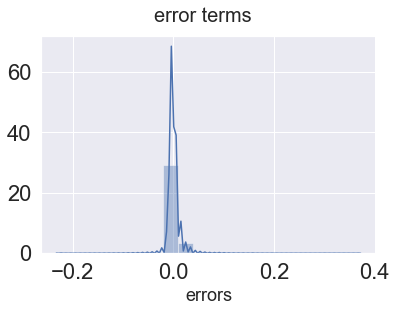

In [130]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [131]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [132]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [133]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [134]:
col1

Index(['product_mrp', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       'Affiliates', 'NPS', 'Stock Index', 'NPSScore', 'GMV_lag_2_per'],
      dtype='object')

In [135]:
# Let's now drop the variables we had manually eliminated as well
# X_test_rfe2 = X_test_rfe2.drop(['SEM', 'Total Investment', 'Online marketing', 'Sponsorship', 'Affiliates', 'TV', 
#                                'Other', 'Digital'], axis = 1)

X_test_rfe2 = X_test_rfe2.drop(['Total Investment', 'TV', 'SEM', 'Content Marketing', 'Online marketing', 
                                'NPS', 'Radio', 'Sponsorship', 'Other', 'Stock Index'], axis = 1)


In [136]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18635 entries, 44315 to 1387
Data columns (total 6 columns):
const            18635 non-null float64
product_mrp      18635 non-null float64
Digital          18635 non-null float64
Affiliates       18635 non-null float64
NPSScore         18635 non-null float64
GMV_lag_2_per    18635 non-null float64
dtypes: float64(6)
memory usage: 1019.1 KB


In [138]:
# Making predictions
y_pred = lm_11.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

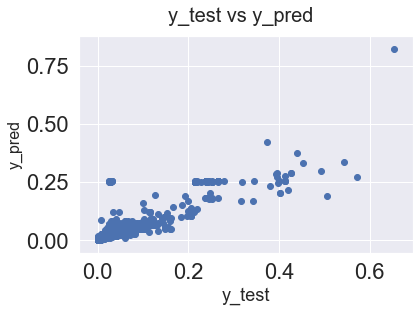

In [139]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [140]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7682293027907089

In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [142]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.013642781612482377

In [143]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [145]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
regr.score(X_test, y_test)

0.85950724329654

In [147]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [ 8.69713999e-01 -2.99263586e+16  8.39876057e-01 -1.80969828e+16
  8.62522088e-01]
Mean and std deviation:  -9604668279975340.0 1.2343738986747528e+16


0.85950724329654

In [148]:
accuracy

0.859548865369128

In [149]:
scores

array([ 8.69713999e-01, -2.99263586e+16,  8.39876057e-01, -1.80969828e+16,
        8.62522088e-01])

### Different types of regression

In [150]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8475713400991423
1.0


In [151]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D752E9A2C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.8481644646124697
0.4138227070120949


In [154]:
# model with optimal alpha
lm = Ridge(alpha=0.41)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8503005518079935
0.8603864450454237


In [153]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.010582095336250697
